In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tkinter as tk
from tkinter import messagebox

In [2]:
df = pd.read_csv('email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [3]:
df.drop(index=5572, inplace=True)
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
detection = ['ham','spam']
enc = OrdinalEncoder(categories = [detection])
df['Category'] = enc.fit_transform(df[['Category']])
df #spam = 1 and ham = 0

,Category,Message
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1.0,This is the 2nd time we have tried 2 contact u...
5568,0.0,Will ü b going to esplanade fr home?
5569,0.0,"Pity, * was in mood for that. So...any other s..."
5570,0.0,The guy did some bitching but I acted like i'd...


In [5]:
X = df['Message']
y = df['Category']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
print("\n" + "="*50)
print("="*50)

# Create and train the model with CountVectorizer
vectorizer_count = CountVectorizer(stop_words='english', lowercase=True)
X_train_count = vectorizer_count.fit_transform(X_train)
X_test_count = vectorizer_count.transform(X_test)

# Train logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_count, y_train)

# Make predictions
y_pred = lr.predict(X_test_count)

accuracy_count = accuracy_score(y_test, y_pred)
print(f"CountVectorizer Accuracy: {accuracy_count:.3f}")
print("\nClassification Report (CountVectorizer):")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


CountVectorizer Accuracy: 0.983

Classification Report (CountVectorizer):
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99      1448
        Spam       1.00      0.87      0.93       224

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



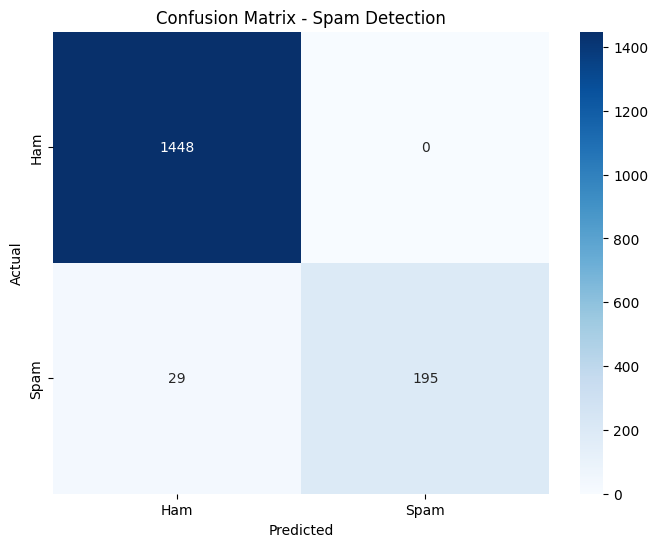

In [8]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Spam Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
print("\n" + "="*50)
print("TOP SPAM INDICATORS")
print("="*50)

# Get feature names and coefficients
feature_names = vectorizer_count.get_feature_names_out()
coefficients = lr.coef_[0]

# Get top 10 spam indicators (highest positive coefficients)
spam_indicators = sorted(zip(coefficients, feature_names), reverse=True)[:10]
print("Top 10 words indicating SPAM(1):")
for coef, word in spam_indicators:
    print(f"{word}: {coef:.3f}")

# Get top 10 ham indicators (lowest coefficients)
ham_indicators = sorted(zip(coefficients, feature_names))[:10]
print("\nTop 10 words indicating HAM(0):")
for coef, word in ham_indicators:
    print(f"{word}: {coef:.3f}")


TOP SPAM INDICATORS
Top 10 words indicating SPAM(1):
uk: 1.963
txt: 1.792
new: 1.776
claim: 1.759
message: 1.753
ringtone: 1.718
service: 1.696
won: 1.681
free: 1.631
mobile: 1.609

Top 10 words indicating HAM(0):
ll: -1.080
gt: -1.021
lt: -0.996
fullonsms: -0.986
right: -0.733
ok: -0.684
happy: -0.676
way: -0.673
later: -0.665
sorry: -0.650


In [10]:
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"CountVectorizer Accuracy: {accuracy_count:.3f}")


MODEL PERFORMANCE SUMMARY
CountVectorizer Accuracy: 0.983


In [11]:
def check_spam():
    email_text = entry.get("1.0", tk.END).strip()
    if not email_text:
        messagebox.showwarning("Input Error", "Please enter an email text")
        return

    # Transform input email into vector
    email_vector = vectorizer_count.transform([email_text])
    prediction = lr.predict(email_vector)[0]

    if prediction == 1:
        result_label.config(text="🚨 Spam Email!", fg="red")
    else:
        result_label.config(text="✅ Not Spam", fg="green")

#GUI
root = tk.Tk()
root.title("Spam Detector (Logistic Regression)")
root.geometry("500x300")
root.config(bg="#f0f0f0")

# Title
title = tk.Label(root, text="Spam Email Detector", font=("Calibri", 16, "bold"), bg="#f0f0f0")
title.pack(pady=15)

# Text Entry Box
entry = tk.Text(root, height=5, width=50, font=("Arial", 18))
entry.pack(pady=10)

# Check Button
btn = tk.Button(root, text="Check", command=check_spam, font=("Arial", 12), bg="black", fg="white")
btn.pack(pady=5)

# Result Label
result_label = tk.Label(root, text="", font=("Arial", 14, "bold"), bg="#f0f0f0")
result_label.pack(pady=10)

# Run GUI
root.mainloop()